In [2]:
from IPython.display import Image

Postęp technologiczny w dziedzinie przetwarzania obrazów oraz urządzeń służących do akwizycji danych trójwymiarowych (3D)  spowodował wzrost dostępności wysokiej klasy kamer i aparatów fotograficznych. Ich główną cechą charakterystyczną jest zdolność do pracy zarówno w zakresach światła widzialnego, jak i bliskiej podczerwieni. Pozwala to na stworzenie wysokiej rozdzielczości systemów wizyjnych, umożliwiających rekonstrukcję sceny na podstawie danych pozyskanych z różnego typu czujników np. w postaci chmury punktów. Wykrywanie i precyzyjne pozycjonowanie w przestrzeni trójwymiarowej stanowi zatem kluczowy element m.in. procesów automatyzacji, robotyzacji, czy rozwoju technologii rozszerzonej rzeczywistości.

### Po co chcemy określić położenie obiektu w 3D na podstawie danych z kamer?
W zależności od dziedziny może nieść to za sobą szereg korzyści, m.in.:
- medycyna: precyzyjne określenie lokalizacji narzędzia chirurgicznego czy struktury krytycznej (naczynia czy zmiany nowotworowej)
- przemysł samochodowy: określenie lokalizacji innych obiektów na drodze i podejmowanie decyzji na tej podstawie np. pieszy, inny samochód, drzewo
- robotyka: detekcja poszukiwanego obiektu, jego lokalizacja i dalsza manipulacja
- sport: śledzenie obiektów  w czasie rzeczywistym: np. piłki i graczy podczas meczu piłkarskiego

### W jaki sposób można to zrobić? 
Lokalizatory (optical tracking system) to urządzenia, które umożliwiają pozycjonowanie obiektów w przestrzeni trójwymiarowej z bardzo dużą dokładnością. Wśród popularnych rozwiązań można wyróżnić te oparte na markerach, które wykorzystują wysokiej rozdzielczości systemy wizyjne do wyznaczania i śledzenia położenia w 3D. Głównym komponentem takiego urządzenia jest zestaw kamer dostarczający danych obrazowych o obserwowanej scenie z różnych pozycji w przestrzeni. Drugą istotną częścią składową stanowią czujniki (rigid bodies) zbudowane z markerów typu aktywnego lub pasywnego. Zazwyczaj cechują się unikalną strukturą lub szczególną geometrią pozwalającą na jednoznaczną detekcję znacznika na obrazie i estymację jego położenia na bazie danych z układu stereowizyjnego (2x RGB kamera lub RGB + kamera głębi). Na rynku dostępnych jest wiele rodzajów lokalizatorów wykorzystujących markery bazujące na różnych zjawiskach fizycznych, natomiast głównie dominują urządzenia pracujące w zakresie światła widzialnego lub podczerwieni. 

### Jak one działają?
Kluczowym etapem w procesie pozycjonowania obiektu w 3D jest określenie relacji przestrzennej pomiędzy układami współrzędnych: lokalnym czujnika oraz zewnętrznym układu odniesienia. Innymi słowy polega on na zdefiniowaniu położenia i orientacji układu współrzędnych sensora w przestrzeni trójwymiarowej. Dzięki temu możliwe jest przedstawienie punktów związanych z danym układem lokalnym względem układu globalnego. 

Lokalizacja obiektów realizowana jest zazwyczaj w oparciu o zbiór markerów czyli zestaw wyróżniających się punktów na powierzchni danego elementu. Odległości między nimi są stałe i nie zmieniają się w czasie. W związku z tym na podstawie trzech punktów niewspółliniowych można zdefiniować kartezjański układ współrzędnych, a tym samym jednoznacznie ustalić pozycję obiektu w przestrzeni. W ten sposób możliwe jest wyznaczenie transformacji sztywnej pomiędzy danym sensorem a układem odniesienia poprzez zdefiniowanie odpowiednich macierzy rotacji (axis: X, Y, Z) i translacji (axis: X, Y Z), co determinuje ruch ciała sztywnego o sześciu stopniach swobody. Opisaną sytuacje ilustruje rysunek, a przekształcenie może zostać opisane następującymi zależnościami:

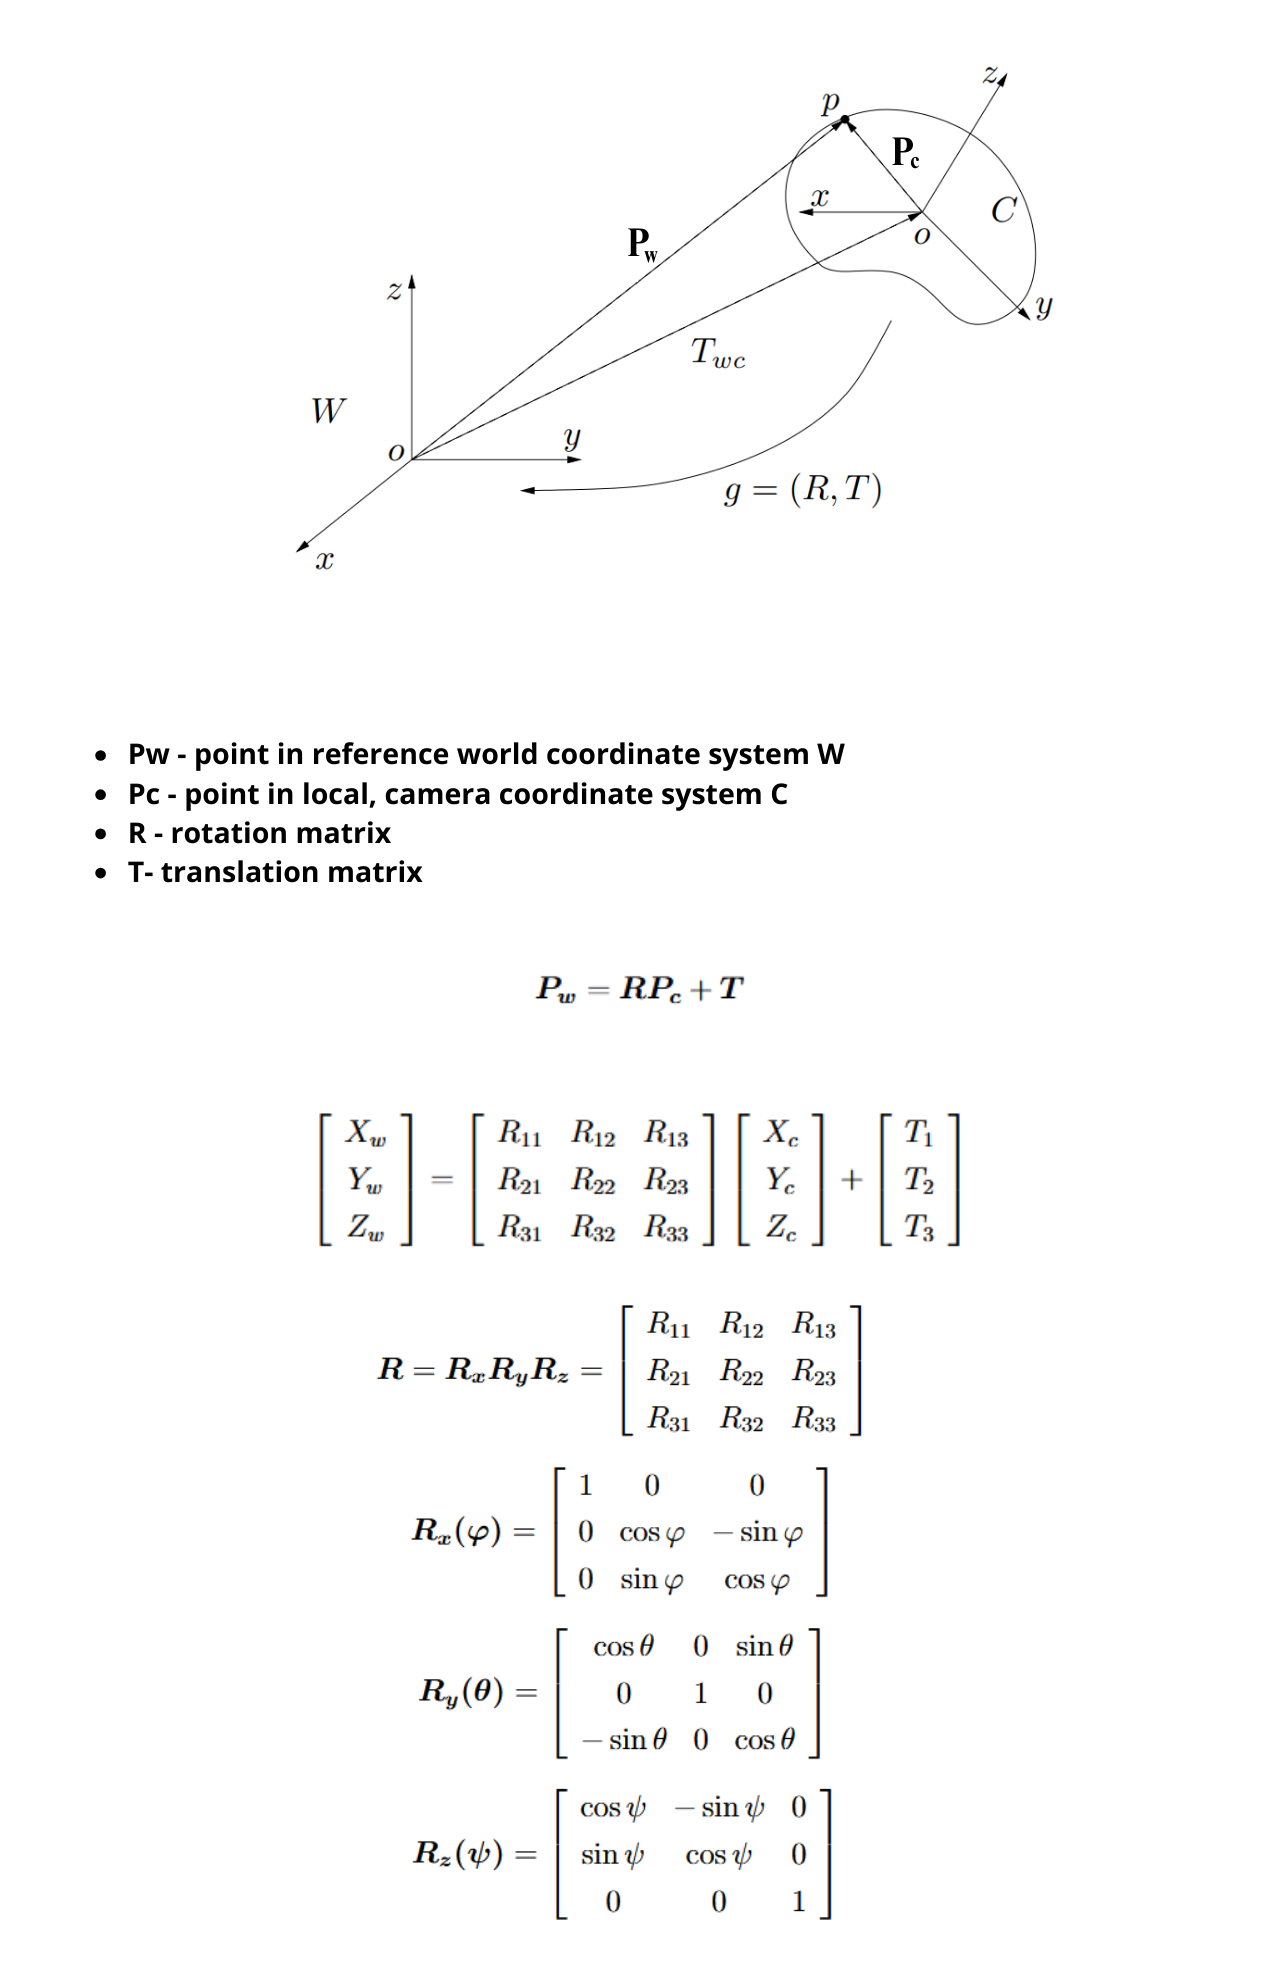

In [3]:
# source of scheme: 
Image(filename=".././images/0_1.png", width=450)

Translacja obiektu jest definiowana przez wektor przesunięcia T = [T_1, T_2, T_3] o punkcie zaczepiania w początku zewnętrznego układu współrzędnych W i punkcie końcowym w początku układu po transformacji C. Opisuje on przemieszczenie wszystkich punktów obiektu, w tym samym kierunku o określoną długość.   

Rotacja obiektu polega na obrocie układu współrzędnych względem początku zewnętrznego układu współrzędnych. Równania przedstawiają macierze obrotu R_x, R_y i R_z wokół każdej z osi X,Y oraz Z. Macierz R całkowitego obrotu w przestrzeni 3D powstaje poprzez wymnożenie przez siebie macierzy obrotu wokół każdej z osi R_x, R_y i R_z. MAcierz rotacji ma właściwość that jej odwrotność to jej transpozycja. Oznacza to, że jeśli macierz R opisuje ruch z A do B, to macierz R^T będzie opisywać ruch z B do A. Opisać te zależność może to równanie: R ^ T * R = R * R ^ T = I.

Podsumowując, aby określić położenie obiektu Pw w 3D na podstawie danych z kamer należy:
- wykryć obiekt na obrazie 2D i określić jego położenie w pikselach
- określić jego położenie 2D w układzie współrzędnych obrazu 
- obliczyć położenie tego obiektu w 3D = Pc, w układzie współrzędnych kamery 
- obliczyć położenie tego obiektu w 3D = Pw, ALE w referencyjnym układzie odniesienia (świata) 

Przydatne w tym procesie będzie wiedza o zniekształceniach obrazu i procesie kalibracji kamery.